# Fishery dataset: Predicting weight with machine learning

In this project, we aim to create machine learning models to predict the live weight of caught of fish from a fishing operation. We will try to uncover important and predictive features of the fishing operations which will be used as parameters in our models. 

Our goal is to use create three supervised learning models which all predict the same outcome.

Our methodology is divided into three parts: 

**[Part A - Preprocessing](#pre_processing)**

This part starts by initializing python and all the libraries we use to process the data. Further we perform exploratory data analysis (EDA) to understand the features, remove anomalies in the dataset and perform potential normalizations.

**[Part B - Supervised learning](#part_b)**

**Part c - Unsupervised learning**

<a id="pre_processing"></a>
## Part A - Preprocessing

In this part we will analyse and prepare the data for our machine learning models.

### Step 0 - Importing libraries and reading the data

To start the project, we need to import the most common libraries we will use to explore the data. This includes pandas, numpy, matplotlib, seaborn, and sklearn.

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
plt.style.use('ggplot')

### Step 1 - Reading the data

The data from the fishery reports are in the form of a CSV file. We read this file into a Pandas dataframe allowing for easy analysis and manipulation.

To ensure that the data was sucessfully loaded into the DataFrame, it can be useful to inspect the initial content. To do so we can use the `df.head(n)` function to display the first n rows and the column headers of the dataframe. 

*NOTE:* The filepath assumes that the csv file is located in a "Resources" directory in the project root directory. Please ensure that this directory and file is included prior to running the code. 

In [161]:
df = pd.read_csv('../Resources/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', delimiter=';')
df.head(5)

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


### Step 2 - Understanding the data

Now that we've loaded the data, we can start our analysis.

In [162]:
shape = df.shape
print("DataFrame contents")
print(f"Rows: {shape[0]}, Columns: {shape[1]}")

DataFrame contents
Rows: 305434, Columns: 45


In [163]:
print("DataFrame column names and their datatypes")
df.dtypes

DataFrame column names and their datatypes


Melding ID                    int64
Meldingstidspunkt            object
Meldingsdato                 object
Meldingsklokkeslett          object
Starttidspunkt               object
Startdato                    object
Startklokkeslett             object
Startposisjon bredde         object
Startposisjon lengde         object
Hovedområde start (kode)    float64
Hovedområde start            object
Lokasjon start (kode)       float64
Havdybde start                int64
Stopptidspunkt               object
Stoppdato                    object
Stoppklokkeslett             object
Varighet                      int64
Fangstår                      int64
Stopposisjon bredde          object
Stopposisjon lengde          object
Hovedområde stopp (kode)    float64
Hovedområde stopp            object
Lokasjon stopp (kode)       float64
Havdybde stopp                int64
Trekkavstand                float64
Redskap FAO (kode)           object
Redskap FAO                  object
Redskap FDIR (kode)         

In [164]:
df.describe()

,Melding ID,Hovedområde start (kode),Lokasjon start (kode),Havdybde start,Varighet,Fangstår,Hovedområde stopp (kode),Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart - FDIR (kode),Art - FDIR (kode),Art - gruppe (kode),Rundvekt,Lengdegruppe (kode),Bruttotonnasje 1969,Bruttotonnasje annen
count,3.054340e+05,303433.000000,303433.000000,305434.000000,305434.000000,305434.000000,303472.000000,303472.000000,305434.000000,3.054100e+05,305246.000000,300456.000000,300452.000000,300452.000000,3.004560e+05,304750.000000,234005.000000,74774.000000
mean,1.658783e+06,14.463737,19.074712,-228.025292,537.095526,2017.999941,14.430415,18.883353,-229.084850,1.566397e+04,46.489746,1326.729934,1414.625914,259.746585,7.438208e+03,4.575032,1408.386975,186.172573
std,9.130738e+04,13.001244,18.469340,226.062493,2201.624688,0.007677,12.973150,18.361244,224.277365,9.033085e+04,13.534202,614.506560,633.188386,320.124913,4.281086e+04,0.692769,1148.384145,165.761157
min,1.497177e+06,0.000000,0.000000,-5388.000000,0.000000,2017.000000,0.000000,0.000000,-5388.000000,0.000000e+00,11.000000,412.000000,211.000000,101.000000,0.000000e+00,3.000000,104.000000,21.000000
25%,1.567228e+06,5.000000,7.000000,-273.000000,123.000000,2018.000000,5.000000,7.000000,-274.000000,2.533000e+03,32.000000,1022.000000,1022.000000,201.000000,6.400000e+01,4.000000,496.000000,87.000000
50%,1.674230e+06,8.000000,12.000000,-196.000000,296.000000,2018.000000,8.000000,12.000000,-198.000000,7.598000e+03,51.000000,1032.000000,1032.000000,203.000000,3.000000e+02,5.000000,1184.000000,149.000000
75%,1.735590e+06,20.000000,24.000000,-128.000000,494.000000,2018.000000,20.000000,24.000000,-127.000000,2.259900e+04,55.000000,1038.000000,2202.000000,302.000000,2.236000e+03,5.000000,2053.000000,236.000000
max,1.800291e+06,81.000000,87.000000,1220.000000,125534.000000,2018.000000,81.000000,87.000000,1616.000000,1.588863e+07,80.000000,6619.000000,6619.000000,9903.000000,1.100000e+06,5.000000,9432.000000,1147.000000


The dataset contains in total 305.434 rows of data, with 45 columns. Having a large dataset is beneficial for our machine learning purposes. Generally having more data gives us flexibility in choosing relevant features. It also grants us a larger training, testing, and validation datasets when building our models. This can result in higher accuracy, granted the data is well-prepared and have good quality.

# Step 2 - Data preparation

The dataset contains several columns which are unnecessary for our purpose. This includes the message report metadata, as well as duplicate columns which represents the same information in codes instead of words. We will now remove these columns.

In [165]:
df = df[[
    'Starttidspunkt','Startposisjon bredde', 'Startposisjon lengde', 'Hovedområde start',
    'Havdybde start', 'Stopptidspunkt', 'Varighet', 'Fangstår', 'Stopposisjon bredde', 
    'Stopposisjon lengde', 'Hovedområde stopp', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR',
    'Art - FDIR', 'Art - gruppe', 'Rundvekt', 'Bruttotonnasje annen', 
    'Bruttotonnasje 1969', 'Bredde', 'Fartøylengde'
    ]].copy()

Several of the datatypes which are supposed to be continuous numeric values but are interpreted as objects. This is likely because the numbers are all using comma as decimal seperator, which is the standard representation in Norway. There are also several date and time object columns which needs to be converted to datetime.

In [166]:
df['Starttidspunkt'] = pd.to_datetime(df['Starttidspunkt'], format='mixed')
df['Stopptidspunkt'] = pd.to_datetime(df['Stopptidspunkt'], format='mixed')

df['Fartøylengde'] = pd.to_numeric(df['Fartøylengde'].str.replace(',', '.'))
df['Bredde'] = pd.to_numeric(df['Bredde'].str.replace(',', '.'))

df['Startposisjon bredde'] = pd.to_numeric(df['Startposisjon bredde'].str.replace(',', '.'))
df['Startposisjon lengde'] = pd.to_numeric(df['Startposisjon lengde'].str.replace(',', '.'))

### Missing data

Given our large dataset, it's highly likely that some of the data will be missing, corrupt or unwanted.

Empty cells are considered null values. The models in sci kit learn will give us an error when encountering these. Therefore, it is important to deal with null values during the pre-processing phase.
 
We must decide whether to drop the rows and columns containing null values, or to fill in the missing cells with another value (e.g. the mean)? The ladder approach is referred to as 'imputation'.

We use the `df.isna()` method on our dataframe to iterate each column checking for null values. `sum()` gives us the total for each column:

In [167]:
na_counts = df.isna().sum()
null_value_columns = na_counts[na_counts > 0]

print(f"Number of columns with no missing values: {len(na_counts[na_counts == 0])}")
null_value_columns

Number of columns with no missing values: 11


Hovedområde start         4124
Hovedområde stopp         4124
Trekkavstand                24
Redskap FDIR               188
Art - FDIR                4982
Art - gruppe              4982
Rundvekt                  4978
Bruttotonnasje annen    230660
Bruttotonnasje 1969      71429
Bredde                     684
dtype: int64

We observe that 10 of our remaining 21 columns contain missing values. Among these, the columns concerning "Bruttotonnasje" have a significant amount of missing values. Let's examine these more closely.

In [ ]:
null_count = df[df[['Bruttotonnasje 1969', 'Bruttotonnasje annen']].isna().all(axis=1)].shape[0]
print(f'Number of rows with both columns null: {null_count}')

overlap_count = df[(df['Bruttotonnasje 1969'] == df['Bruttotonnasje annen']) & df['Bruttotonnasje 1969'].notna()].shape[0]
print(f'Number of rows with overlapping values: {overlap_count}')

We see that all rows have at least one of the two "Bruttotonnasje" columns. If we want to use these columns further we would have to combine them into one feature. However, since "Bruttotonnasje annen" are a unambigous category which can contain many different standards, it can be a challange to merge then, since it doesn't have a 1:1 relation.

To further evaluate what to do with these columns, we shall look at their relation to our target, "Rundvekt". We also want to evaluate its relation to a feature which can be closely related, "Fartøylengde".

In [ ]:
def filter_not_null_and_drop(df: pd.DataFrame, a: str, b: str):
    filtered_df = df[df[a].notna()]
    return filtered_df.drop(columns=[b])

In [ ]:
a = "Bruttotonnasje 1969"
b = "Bruttotonnasje annen"

filtered_df_sixty_nine = filter_not_null_and_drop(df, a, b)
filtered_df_other = filter_not_null_and_drop(df, b, a)

In [ ]:
related_features = ["Fartøylengde", "Rundvekt"]
df_corr_brutto_sixty_nine = filtered_df_sixty_nine[[a] + related_features].corr()
df_corr_brutto_other = filtered_df_other[[b] + related_features].corr()

In [ ]:
df_corr_brutto_sixty_nine

In [ ]:
df_corr_brutto_other

Looking at these correlations we see that Fartøylengde and Bruttotonnasje have a high correlation, indicating that they are dependant on each other. Having two highly correlated features provide redundant information. Therefore, we choose to drop one of these. We choose to drop Bruttotonasje since this has a lower correlation to our target variable "Rundvekt".

In [ ]:
df.drop(['Bruttotonnasje 1969', 'Bruttotonnasje annen'], axis=1, inplace=True)

In [ ]:
rows_with_null = df.isna().any(axis=1)

# Count the number of rows with any null values
null_row_count = rows_with_null.sum()

print(f"Number of rows with any null values: {null_row_count}")
print(f"Percentage rows with null values: {null_row_count / df.shape[0] * 100:.2f} %")

After dropping the "Bruttotonnasje" columns, the rows with null values are now only 3.15 % of the entire dataset. Removing these should have little effect on our models.

In [ ]:
df = df.dropna()

## Step 3 - Feature Understanding

Here we will primarily use univariate analysis to understand the individual variables better.

To start off it's useful to draw histograms of all numeric variables. This will help us understand the variance of the data, help us identify outliers which can negatively affect our models.

In [ ]:
df.hist(bins=60, figsize=(20,15));plt.show()

In the resulting histogram its clear that some columns, such as "Varighet" and "Rundvekt" have outliers that can affect the quality of our models. To further analyse these variables a boxplot is useful.  

In [ ]:
def draw_boxplots(variables):
    num_of_features = len(variables)
    
    num_of_columns = 5
    num_of_rows = int(np.ceil(num_of_features / num_of_columns))
    
    fig, axes = plt.subplots(nrows=num_of_rows, ncols=num_of_columns, figsize=(15, num_of_rows * num_of_columns))
    axes = axes.flatten()

    for i, col in enumerate(variables):
        df.boxplot(column=col, ax=axes[i])
    
    # Hide empty subplots when (number_of_features < num_of_rows * num_of_columns)
    for i in range(num_of_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [ ]:
heavy_outliers = ['Rundvekt', 'Varighet', 'Trekkavstand', 'Havdybde start']
draw_boxplots(heavy_outliers)

Lets count the number of outliers

In [ ]:
def find_outlier_value(feature : str):
    """
    Outlier is defined as 1.5 * IQR +- nearest quartile
    
    :param feature: name of the column in the DataFrame  
    :return: tuple (lower_bound, upper_bound) which represents the upper and lower bound of outliers in the DataFrame column. 
    """
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    lower_bound_extreme = q1 - 3 * iqr
    upper_bound_extreme = q3 + 3 * iqr
    
    return lower_bound, upper_bound, lower_bound_extreme, upper_bound_extreme

In [ ]:
shape = []

for feature in heavy_outliers:
    lower, upper, lower_extreme, upper_extreme = find_outlier_value(feature)
    count = df.query(f'(`{feature}` < @lower) or (`{feature}` > @upper)').shape[0]
    count_extreme = df.query(f'(`{feature}` < @lower_extreme) or (`{feature}` > @upper_extreme)').shape[0]
    shape.append({'Feature': feature, 'Outliers': count, 'Extreme outliers': count_extreme})

outliers_df = pd.DataFrame(shape)
print(outliers_df)

We have many (extreme) outliers, specificly in the feature "Rundvekt". This may have a negative effect on our models, and we therefore need to take action.

Lets explore some normalization options.

In [ ]:
_,_,_,extreme_upper = find_outlier_value('Rundvekt')

df['Rundvekt_clipped'] = df['Rundvekt'].clip(0, extreme_upper)

In [ ]:
df['Rundvekt_clipped'].hist(bins=50)

The plot shows a distribution of datapoints where those containing a 'Rundvekt' value that exceeds the threshold set by our definition of an extreme outlier have been excluded.

We can create a dataframe where we exclude all rows where 'rundvekt'-values >= the extreme upper limit outliers. 

In [ ]:
# df_capped = df.query('Rundvekt < @extreme_upper')
# df_capped

# df_capped = df.copy();

In order for us to better be able to use and analyze information currently contained in 'Starttidspunkt', we have to engage in some feature engineering. Right now, each datetime object is a unique, continuous value that makes it hard to spot potential patterns regarding dates and time. Dealing with only four seasons would be easier!

Lets create and apply a function that maps each datetime object to either 'Winter', 'Spring', 'Summer' or 'Fall':


In [ ]:
df['month'] = df['Starttidspunkt'].dt.month
df = df.drop(['Starttidspunkt'], axis=1)

def map_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['month'].apply(map_to_season)

df = pd.get_dummies(df, columns=['Season'])
df = df.drop(['month'], axis=1)

### Counting categorical features

When we will build our models, many of the models we will build do not directly support categorical data. We need to give these values a numerical value, for example through one-hot encoding. One-hot encoding turn each categorical column into as many columns as there are unique values. This can result in our dataset containing many dimensions, increasing the complexity. Several of the machine learning algorithms can perform worse when the data is of high dimensionality. Therefore, we wish to reduce this complexity by removing values which contains insignificant percentage of the data.

We have specifically two categorical columns with many unique values: "Art - FDIR" and "Hovedområde start".

In [ ]:
def count_unique_values(df: pd.DataFrame, category: str):
    count = df[category].value_counts()
    
    percentage = df[category].value_counts(normalize=True) * 100
    
    result = pd.DataFrame({
    'Count': count,
    'Percentage': percentage
    })
    
    return result

In [ ]:
def unique_values_below_percentage(df: pd.DataFrame, category: str, target: float):
    percentage = df[category].value_counts(normalize=True) * 100
    
    less_than_target = percentage[percentage < target]
    
    num_values = less_than_target.count()
    num_rows = df[category].value_counts().loc[less_than_target.index].sum()
    
    return num_values, num_rows

In [ ]:
count_unique_values(df, "Art - FDIR")

In [ ]:
def print_unique():
    print(f"Number of unique values in column below {target_percentage} %: {values}")
    print(f"Number of rows {rows}")

In [ ]:
target_percentage = 0.05
values, rows = unique_values_below_percentage(df, "Art - FDIR", target_percentage)
print(f"Number of unique values in column below {target_percentage} %: {values}")
print(f"Number of rows {rows}")

In [ ]:
target_percentage = 0.05
values, rows = unique_values_below_percentage(df, "Hovedområde start", target_percentage)
print(f"Number of unique values in column below {target_percentage} %: {values}")
print(f"Number of rows {rows}")

We observe that over 60 unique values have less than 0.05 % observation, where 11 of the values only have 1 observation. For Hovedområde start we observe that 14 values have less than 0.05 % observation. We will remove from our dataset which will remove over 70 features from our one-hot encoded dataset.  

In [ ]:
def remove_values_below_percentage(df: pd.DataFrame, category: str, target: float):
    percentage = df[category].value_counts(normalize=True) * 100
    
    less_than_target = percentage[percentage < target]
    
    return df[~df[category].isin(less_than_target.index)]

In [ ]:
df = remove_values_below_percentage(df, "Art - FDIR", target_percentage)
df = remove_values_below_percentage(df, "Hovedområde start", target_percentage)
df = remove_values_below_percentage(df, "Redskap FDIR", target_percentage)

## Step 4 : Feature relationship

Now that we have explored the individual variables by themselves, we will do a multivariate analysis. This will help us understand the relationship between the variables in the dataset.

In [ ]:
from scipy import stats

def calculate_anova(target, features):
    shape = []
    for feature in features:
        anova_result = stats.f_oneway(*[group[target].values for name, group in df.groupby(feature)])
        
        shape.append({'Feature': feature, "Values": f"F={anova_result.statistic}, p-value={anova_result.pvalue}"})
    
    return pd.DataFrame(shape)

In [ ]:
calculate_anova("Rundvekt", ["Art - FDIR", "Redskap FDIR", "Hovedområde start", "Hovedområde stopp"])

In [ ]:
sampled_df = df.sample(n=50000)

In [ ]:
ax = sns.scatterplot(x='Fartøylengde',
                     y='Rundvekt',
                     hue='Redskap FDIR',
                     data=sampled_df,
                     alpha=0.5)
ax.set_title('Fartøylengde vs Rundvekt')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Plasserer legenden på siden
plt.show()

In [ ]:
features = [ 'Fartøylengde', 'Rundvekt', 'Varighet','Trekkavstand', 'Havdybde start']


In [ ]:
# sampled_df = df_capped.sample(n=150000)
# sns.pairplot(sampled_df, vars=features, hue='Redskap FDIR')
# plt.show()

We can create a correlation matrix to explore the linear association between our variables

In [ ]:
features = [ 'Season_Winter', 'Season_Spring','Season_Summer', 
            'Season_Fall', 'Bruttotonnasje 1969', 'Fartøylengde', 'Rundvekt', 'Varighet',
            'Trekkavstand', 'Havdybde start']
df_corr = df[features].corr()
df_corr

To improve readability, we turn it into a heatmap using the Seaborn library

<Axes: >

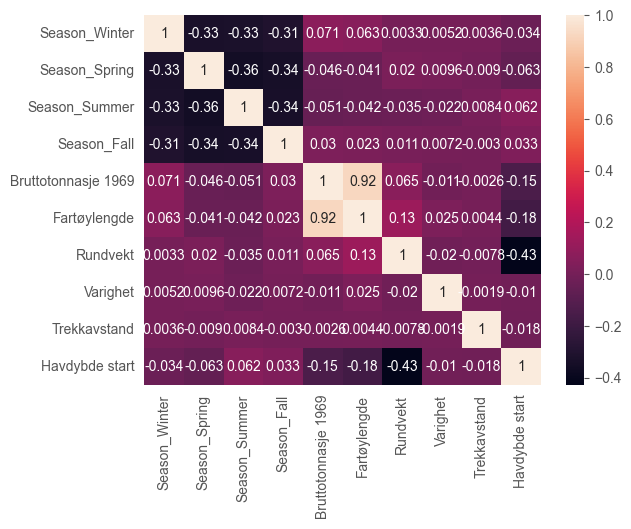

In [142]:
sns.heatmap(df_corr, annot=True)

While there are no values that stand out in a shocking way, we can clearly see that 'Fartøylengde' is somewhat correlated with both 'Rundvekt' and 'Havdybde_start'. While the numbers are a bit hard to read in the heatmap, we can also see from the dataframe that there seems to be an increase in distance ('Trekkavstand') during the winter compared to the other seasons. 
Information like this might not be perfectly relevant for our purposes in this task, but they do show how this type of analysis can prove useful in data science. 

If we were to discover values close to 1 or -1, it tells us that two of our features are extremely closely linked. Then we might not need both of them, as the value of one feature infers a certain value of the other. Issues might also arise if we were to scale only one of the features, as this hides the correlation from a machine learning model.

In [143]:
features = [ 'Season_Winter', 'Season_Spring','Season_Summer', 
            'Season_Fall', 'Fartøylengde', 'Rundvekt', 'Varighet',
            'Trekkavstand', 'Havdybde start', 'Art - FDIR', 'Hovedområde start', 'Redskap FDIR']

df_n = df[features].copy()


In [144]:
df_n = pd.get_dummies(df_n, columns=['Art - FDIR'])
df_n = pd.get_dummies(df_n, columns=['Redskap FDIR'])
df_n = pd.get_dummies(df_n, columns=['Hovedområde start'])


In [145]:
df_n

,Season_Winter,Season_Spring,Season_Summer,Season_Fall,Fartøylengde,Rundvekt,Varighet,Trekkavstand,Havdybde start,Art - FDIR_Akkar,...,Hovedområde start_Vest av Irland,Hovedområde start_Vest av Skottland (Hebridene),Hovedområde start_Vest av Tromsøflaket,Hovedområde start_Vest-Finnmark,Hovedområde start_Vest-Spitsbergen,Hovedområde start_Vestfjorden (Lofoten),Hovedområde start_Vikingbanken,Hovedområde start_Øst av Færøyene,Hovedområde start_Øst-Finnmark,Hovedområde start_Østlige Norskehav
1,True,False,False,False,56.8,9594.0,295,3970.0,-335,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,56.8,8510.0,295,3970.0,-335,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,56.8,196.0,295,3970.0,-335,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,56.8,134.0,295,3970.0,-335,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,56.8,9118.0,267,11096.0,-403,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305429,True,False,False,False,57.3,145.0,232,27855.0,-349,False,...,False,False,False,False,True,False,False,False,False,False
305430,True,False,False,False,57.3,136.0,232,27855.0,-349,False,...,False,False,False,False,True,False,False,False,False,False
305431,True,False,False,False,57.3,132.0,232,27855.0,-349,False,...,False,False,False,False,True,False,False,False,False,False
305432,True,False,False,False,57.3,102.0,232,27855.0,-349,False,...,False,False,False,False,True,False,False,False,False,False


<a id="part_b"></a>
## Part B - supervised learning

Now that we have pre-processed and analyzed our data, we are going to train three models using a machine learning technique called 'supervised learning'. As stated in the introduction, we want want our models to predict the live weight of caught of fish from a fishing operation. 
A model that generalizes well, will (hopefully) be able to predict live weight values based on the information it gets from the other features of our dataset. 
But in order to make a prediction about unlabeled data, it might be useful to let it train on a big chunk of labeled data. By 'labeled data' we mean data that contains the correct answer(label). This enables it to map certain feature values/patterns to specific values of live weight. 

### Regression vs Classification

The aim for a classification algorithm is to predict a correct label in the form of a cathegorical value or a limited, discrete set of integers. This label is taken from a predefined list of possible options. We can measure a classifiers perfomance by analyzing the amount of true positives, false positives, true negatives and false negatives.

As seen in the dataframe, live weight is a continuous number and thus we can't use a classifier to make predictions about its values. This is a regression problem, so the predictions are going to be real numbers calculated based on a local average or a fitted line through the data set. Our aim is to train a model that is able to predict values as close as possible to the target values. 

### Evaluation

Pre preparation the dataset and fine tuning of different hyperparameters should hopefully result in a model that performs better than before we made the adjustments, but how do we know that it is improving?

For regression models there are several metrics that can offer us an insight into our models perfomance.
In this task we are going to use both the Mean Squared Error(MSE) and the R^2 score.

MSE measures the average squared difference between the actual and predicted values of the dependent variable. The value of the MSE itself largely depends on the scale of the values in our dataset, so a large or small number does not tell us much on its own.

The R^2 score gives us a value between 0 and 1 that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. In other words, it gives us a way of measuring how well our chosen features explains the variance in the target variable.

### Grid search

Each model depends on specific parameters being set to be able before it can be used for training and predictions. Since knowing the optimal values for each parameter is nearly impossible without some tweeking, we will make us of SKlearn's GridSearchCv. Grid Search works like a for loop, and allows us to test several different values in search for the best parameter values. 

Grid search also perform cross validation to help select the best hyperparameters. (https://artint.info/3e/html/ArtInt3e.Ch8.S3.html#p5)

### Cross validation

Cross validation is the process of splitting our non-test data into a traning set and a validation set. The model is trained and uses the validation to score its performance. This can be repeated several times. By deviding the non-test data into $k$ datasets. Each time, you use $k-1$ datasets for traning and 1 for validation. This is a process called k-fold cross validation.

By doing so one can measure the stability of our model. Since the model is trained with some unique data $k$ times, we can detect whether the model perform differently depending on the data given. This can indicate if the model is overfitting to the traning data (https://artint.info/3e/html/ArtInt3e.Ch7.S4.html#SS3.p3)

# Random Forest

A random forest is an ensemble of decision trees. Decision trees have a tendency to overfit and therefore generalize poorly to new data. The random forest deals with this by using several decision trees that are all created in a different, slightly random way. The predictions of a regression based forest are made by averaging the results produced by the individual decision trees.
Each feature is treated separately from the others in the individual nodes of the decision trees (if/else statements), so in random forests do not require much scaling or normalization.

As each tree in a forest is generated randomly there is no need for grid search to tests different parameter values, but we use it anyway to utilize the cross validation functionality

There are a couple of reasons for choosing a random forest for this task:
- They tend to work well on big datasets
- They usually require less pre processing compared to other ML algorithms
- Overfitting is usually not an issue


In [146]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

def run_rf_model(dataframe, target, number_of_trees):
    print("RUNNING MODEL")
    y = dataframe[[target]]
    X = dataframe.drop([target], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf = RandomForestRegressor(random_state=42, n_estimators=number_of_trees, n_jobs=-1, max_features=8)

    # Implementing cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf, X_train, np.ravel(y_train), cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Fitting the model on the whole training set
    rf.fit(X_train, np.ravel(y_train))

    y_pred = rf.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Cross-validation scores:", cv_scores)

    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    return rf


In [147]:
# run_rf_grid_search(df_n, "Rundvekt")

In [148]:
rf = run_rf_model(df_n, "Rundvekt", 128)

RUNNING MODEL
Cross-validation scores: [-3.93476298e+08 -4.15807056e+08 -4.27548363e+08 -4.43208703e+08
 -4.07403718e+08]
MSE: 417805376.6444286
RMSE: 20440.28807635618
R²: 0.7462954842388945


In [149]:
importances = rf.feature_importances_

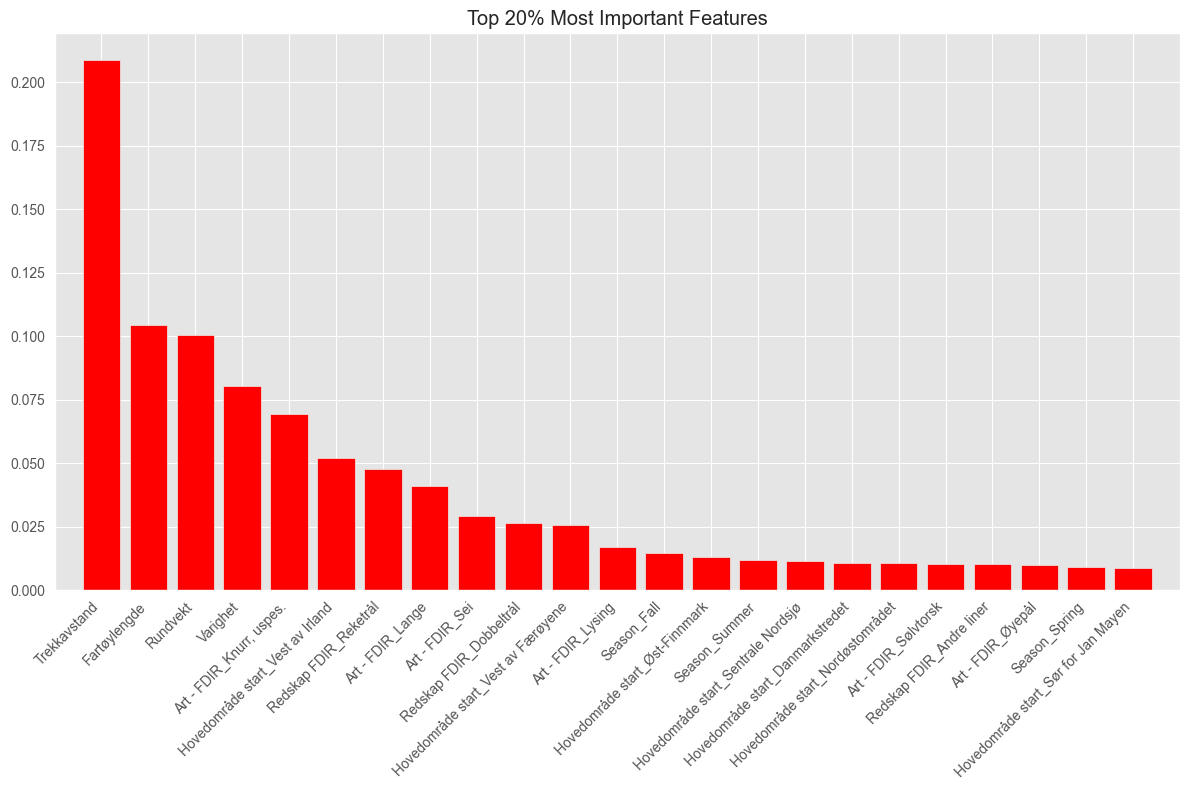

In [150]:
feature_names = df_n.columns.tolist()

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Calculate the number of features to select (top 20%)
num_features = int(len(importances) * 0.2)

# Select the top 20% indices for plotting
top_indices = indices[:num_features]

# Plotting
plt.figure(figsize=(12, 8))  # Adjusted size for clarity
plt.title('Top 20% Most Important Features')
plt.bar(range(num_features), importances[top_indices], color="r", align="center")
plt.xticks(range(num_features), [feature_names[i] for i in top_indices], rotation=45, ha='right')  # Rotated 45 degrees
plt.xlim([-1, num_features])
plt.tight_layout()  # Adjust layout to make room for label
plt.show()

In [151]:

# Create a list of tuples pairing each feature name with its importance
feature_importances = list(zip(feature_names, importances))

# Optionally, sort the list by importance in descending order
feature_importances_sorted = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print each feature with its importance
for feature, importance in feature_importances_sorted:
    print(f"{feature}: {importance:.4f}")

Trekkavstand: 0.2088
Fartøylengde: 0.1043
Rundvekt: 0.1003
Varighet: 0.0806
Art - FDIR_Knurr, uspes.: 0.0694
Hovedområde start_Vest av Irland: 0.0521
Redskap FDIR_Reketrål: 0.0476
Art - FDIR_Lange: 0.0410
Art - FDIR_Sei: 0.0292
Redskap FDIR_Dobbeltrål: 0.0264
Hovedområde start_Vest av Færøyene: 0.0256
Art - FDIR_Lysing: 0.0172
Season_Fall: 0.0145
Hovedområde start_Øst-Finnmark: 0.0129
Season_Summer: 0.0119
Hovedområde start_Sentrale Nordsjø: 0.0113
Hovedområde start_Danmarkstredet: 0.0108
Hovedområde start_Nordøstområdet: 0.0107
Art - FDIR_Sølvtorsk: 0.0104
Redskap FDIR_Andre liner: 0.0102
Art - FDIR_Øyepål: 0.0099
Season_Spring: 0.0092
Hovedområde start_Sør for Jan Mayen: 0.0087
Redskap FDIR_Udefinert garn: 0.0074
Hovedområde start_Vestfjorden (Lofoten): 0.0070
Season_Winter: 0.0061
Hovedområde start_Nordv.- Spitsbergen: 0.0057
Redskap FDIR_Flytetrål: 0.0049
Hovedområde start_Vest av Tromsøflaket: 0.0048
Art - FDIR_Sandflyndre: 0.0047
Art - FDIR_Tobis og annen sil: 0.0036
Hovedområde 

In [152]:
print("hello")

hello


# KNN - regression

The predictions in KNN regressor are made by averaging the target values of the K nearest neighbors in the training set. The model needs every feature to be numeric, and it is sensitive to outliers. It calculates the square root of the sum of the squared differences between corresponding feature values to determine the distance between to data points. This is known as the Euclidean distance. 

We can specify how many neighbours (K) we want it to include.


In [154]:
df_Knn = df_n.copy()

In [155]:
X = df_Knn.drop(['Rundvekt'], axis=1)
y = df_Knn[['Rundvekt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

Some of our models might be sensitive to the scale of the feature values. This meaning that a huge value in one of the features might make a much smaller value in another feature insignificant when calculating a result. This does not however mean that the small feature automatically should be consider less important than the larger feature when making a prediction. They simply might contain information about vastly different domains from the real world.

The distance between different 'Bruttotonnasje' values results in dramatically bigger numbers compared to the distances of 'Båtlengde'. To compensate for these types of gaps in values, we should consider scaling them before training the model.

SKlearn offers us a couple of different build in scaler we can use with StandardScaler, MinMax and RobustScaler as being the most common ones.

We can view scaling as a part of the model itself. A pipeline comes in handy for grouping the scaler and the regressor together. 
We can give the pipeline as an argument to our GridSearchCV along with the different parameters we want to optimize, our chosen scoring metrics, and the number of cross validation groups

Scaler: Because we wish to preserve the relationship between small and large values in our data set, we have chosen the Standard Scaler for KNN

In [156]:
from sklearn.discriminant_analysis import StandardScaler


knn_pipe = Pipeline([('mms', StandardScaler()),
                     ('knn', KNeighborsRegressor())])

params = [{'knn__n_neighbors': [ 35, 50, 80],
         'knn__weights': ['uniform', 'distance']}]

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=5,
                      n_jobs=-1)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'knn__n_neighbors': 80, 'knn__weights': 'distance'}

In [157]:
predictions = gs_knn.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("MSE: {:.2f}".format(mse))
print("r2 score: {:.2f}".format(r2))

MSE: 488263536.42
r2 score: 0.70


# Neural network/deep learning

The type of neural network used in this task is an MLP (Multi Layered Perceptron). This is a feed forward network that uses back propagation to improve.

It consists of input nodes, output node(s) and possible 'hidden layers' of nodes in between them. Each node in one layer is connected to all the nodes in the next layer, and the values passed in changes for every layer they travel.
Weights and biases are added to the values as they travel from one layer to the next. The value recieved by a node is then used as input for an 'activation function' that determines new value to be passed on. 
Neural networks are typically trained using optimization algorithms like gradient descent, where the algorithm adjusts the model parameters (weights and biases) iteratively to minimize a loss function. 

We have chosen the optimization algorithm 'Adam' as our solver. The solver is used to update the model parameters during training. The choice of solver plays a crucial role in determining how weights and biases are updated.

Scaler: Neural networks require input features to exhibit uniform variation, ideally centered around a mean of 0 and a variance of 1. The Standard Scaler again seem like a good choice

In [158]:

mlp_pipe = Pipeline([
    ('mms', StandardScaler()),
    ('mlp', MLPRegressor())
])
mlp_params = {
    'mlp__activation': ['relu'],
    'mlp__hidden_layer_sizes': [(12, 12)], 
    'mlp__solver': ['adam'],
    'mlp__max_iter': [1000],
    'mlp__random_state': [42]
}

gs_mlp = GridSearchCV(
    estimator=mlp_pipe,
    param_grid=mlp_params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

gs_mlp.fit(X_train, np.ravel(y_train))
mlp_y_pred = gs_mlp.predict(X_test)
mse = mean_squared_error(y_test, mlp_y_pred)
r2 = r2_score(y_test, mlp_y_pred)


KeyboardInterrupt: 

In [101]:

print("MSE: {:.2f}".format(mse))
print("r2 score: {:.2f}".format(r2))
gs_mlp.best_params_

MSE: 359244047.10
r2 score: 0.72


{'mlp__activation': 'relu',
 'mlp__hidden_layer_sizes': (12, 12),
 'mlp__max_iter': 1000,
 'mlp__random_state': 42,
 'mlp__solver': 'adam'}

## References

Müller, A. C. (2016). *Introduction to machine learning with Python : a guide for data scientists*. O'Reilly

Poole, D. L. (2017). *Artificial intelligence : foundations of computational agents* (2. ed.). Cambridge University Press


Citation in text:

(Müller, 2016, p. xxx)
(Poole, 2017, p. xxx)